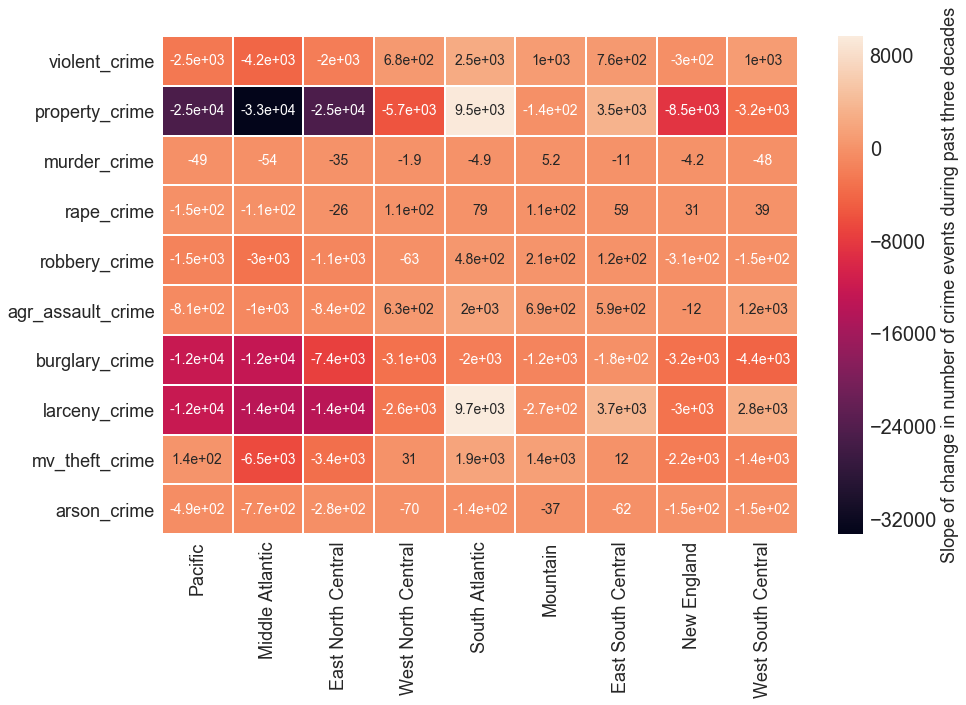

In [5]:


import pandas as pd 
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt  

incarceration=pd.read_csv("D:\LSCE\incarceration_trends-master\incarceration_trends.csv")    
incarceration.fillna(0,inplace=True)

crime_race=pd.DataFrame(columns=["asian","black","latino","native","white"])
crime_type=incarceration.columns[69:79] # get all crime type

agg_func={"violent_crime":["sum"],
          "property_crime":["sum"],
          "murder_crime":["sum"],
          "rape_crime":["sum"],
          "robbery_crime":["sum"],
          "agr_assault_crime":["sum"],
          "burglary_crime":["sum"],
          "larceny_crime":["sum"],
          "mv_theft_crime":["sum"],
          "arson_crime":["sum"],
          }

crime_region_stat=pd.DataFrame(np.zeros([10,9]),columns=set(incarceration["division"]))
for region in set(incarceration["division"]):
    region_data=incarceration.loc[incarceration["division"]==region]
    region_stat=region_data.groupby(["year"]).agg(agg_func)
    region_stat.columns = ['_'.join(col).strip() for col in region_stat.columns.values]
    a=-1
    for crime in crime_type:
        ydata=region_stat.loc[np.append(np.arange(1980,1993),np.arange(1994,2014))][crime+"_sum"]
        xdata=np.append(np.arange(1980,1993),np.arange(1994,2014)) # missing in 1993
        regr = linear_model.LinearRegression()
        regr.fit(xdata.reshape(-1, 1), ydata)
        crime_coef=regr.coef_
        a=a+1
        crime_region_stat.loc[a][region]=crime_coef

crime_region_stat.index=crime_type        
        

fig = plt.figure(figsize=(14,10)) , 
sns.set(font_scale=2)
ax=sns.heatmap(crime_region_stat, annot=True,annot_kws={"size": 14},linewidths=1, cbar_kws={'label': 'Slope of change in number of crime events during past three decades'}) # vmin vmax
ax.figure.axes[-1].yaxis.label.set_size(18)
label_y = ax.get_yticklabels()
plt.setp(label_y,fontsize=18) 
label_x = ax.get_xticklabels()
plt.setp(label_x,fontsize=18)
plt.tight_layout()